Hypothesis: The strength of the Georges Bank anomalously cold SST follows a pattern by season
* This is visualized with composited SST maps over seasons

In [1]:
import xarray as xr
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import imageio
import io

In [2]:
sst_path = "OISST_data/"

In [3]:
#--- Filter to the Georges Bank region
min_lon = -71.5
min_lat = 37
max_lon = -64
max_lat = 47

Composite for 2020-2023:

In [4]:
month = '10'
month_name = 'October'

In [5]:
nc_files = sorted(glob.glob(sst_path+'*202?'+month+'*.nc'))

In [6]:
ds = xr.open_mfdataset(nc_files)
ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon+360,max_lon+360))

In [7]:
sst_mean = ds['sst'].mean(dim='time')

In [8]:
overall_mean = sst_mean.mean(dim='lat')
overall_mean = overall_mean.mean(dim='lon')

In [9]:
high_lim = overall_mean.values[0]+10
low_lim = overall_mean.values[0]-10

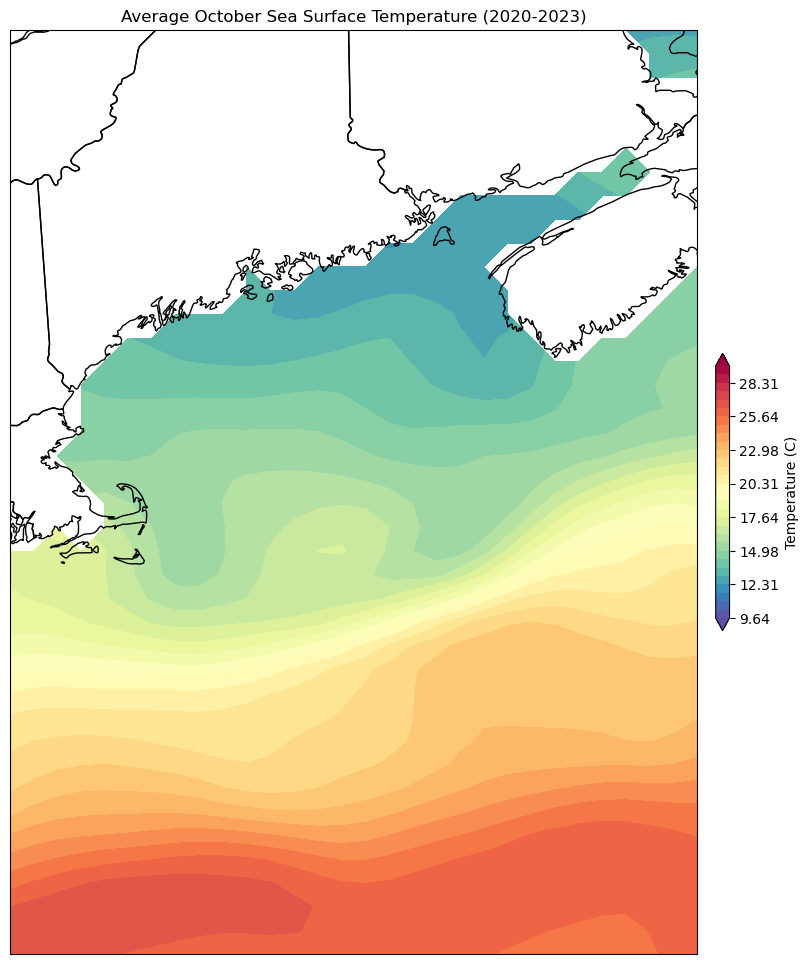

In [10]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(low_lim, high_lim, 31)

c=ax.contourf(sst_mean.lon, sst_mean.lat, sst_mean[0], cmap=cmap, extend='both', levels=levels)
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
ax.set_title('Average '+month_name+' Sea Surface Temperature (2020-2023)')
clb.set_label('Temperature (C)')

ax.add_feature(cfeature.STATES)

Normalized SST difference for 2020-2023: 

In [11]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [12]:
def create_frame(month, month_name):
    
    nc_files = sorted(glob.glob(sst_path+'*202?'+month+'*.nc'))
    
    ds = xr.open_mfdataset(nc_files)
    ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon+360,max_lon+360))
    
    sst_mean = ds['sst'].mean(dim='time')
    overall_mean = sst_mean.mean(dim='lat')
    overall_mean = overall_mean.mean(dim='lon')
    
    normalized = sst_mean[0] - overall_mean.values[0]
    average = str(round(overall_mean.values[0], 1))
    
    projection=ccrs.PlateCarree()
    fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
    cmap = plt.cm.RdYlBu_r
    levels = np.linspace(-10, 10, 31)

    c=ax.contourf(sst_mean.lon, sst_mean.lat, normalized, cmap=cmap, extend='both', levels=levels)
    clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)
    ax.set_title('Normalized (Average = '+average+' C) '+month_name+' SST (2020-2023)')
    clb.set_label('Temperature Difference (C)')
    ax.add_feature(cfeature.STATES)
    
    # Save the current figure to a BytesIO buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    # Read the BytesIO buffer and return as an image
    frame = imageio.imread(buf)

    # Clear the current figure to avoid overlapping plots
    plt.clf()

    return frame

In [13]:
frames = []
for i in range(len(months)):
    frame = create_frame(months[i], month_names[i])
    frames.append(frame)

/tmp/ipykernel_10418/2532650965.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_10418/2532650965.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_10418/2532650965.py:32: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
/tmp/ipykernel_10418/2532650965.py:32: Depreca

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [14]:
imageio.mimsave('Seasonal_Composites/norm_averages.gif', frames, loop=0, duration=500)